# nitrate seasonality in the Arctic Ocean 

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import pylab 
from cartopy.util import add_cyclic_point

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import pandas as pd
import matplotlib.cm as cm
import glob
import matplotlib.colors as colors

## import dataset (1990-2009)

In [3]:
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

In [4]:
ds.NO3.shape

(12, 60, 180, 360)

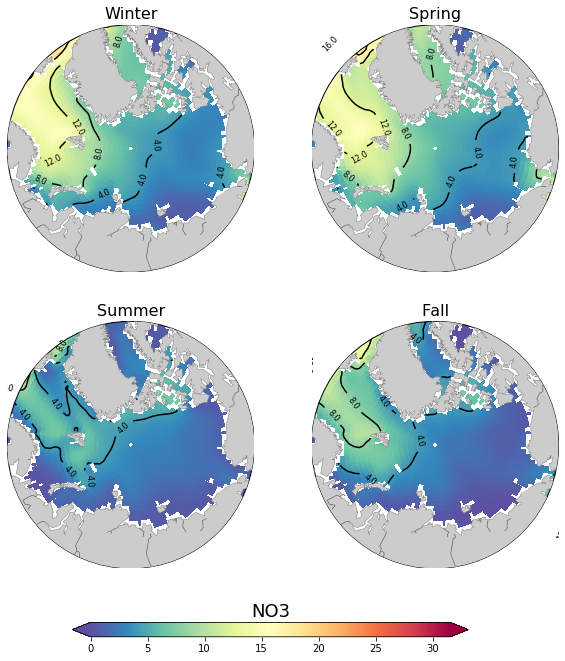

In [6]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

ax1 = fig.add_subplot(221) 
cf = m.pcolor(x,y,np.nanmean(ds.NO3[list(range(2)) + [-1],0,:,:], axis=0),cmap='Spectral_r')
cs=m.contour(x, y, np.nanmean(ds.NO3[list(range(2)) + [-1],0,:,:], axis=0),colors='k')
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
ax1.set_title('Winter', fontsize =16)

ax2 = fig.add_subplot(222) 
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
cf = m.pcolor(x,y,np.nanmean(ds.NO3[2:5,0,:,:], axis=0),cmap='Spectral_r')
cs=m.contour(x, y, np.nanmean(ds.NO3[2:5,0,:,:], axis=0),colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
ax2.set_title('Spring', fontsize =16)


ax3 = fig.add_subplot(223) 
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
cf = m.pcolor(x,y,np.nanmean(ds.NO3[5:8,0,:,:], axis=0),cmap='Spectral_r')
cs=m.contour(x, y, np.nanmean(ds.NO3[5:8,0,:,:], axis=0),colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
ax3.set_title('Summer', fontsize =16)


ax4 = fig.add_subplot(224) 
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
cf = m.pcolor(x,y,np.nanmean(ds.NO3[8:11,0,:,:], axis=0),cmap='Spectral_r')
cs=m.contour(x, y, np.nanmean(ds.NO3[8:11,0,:,:], axis=0),colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
ax4.set_title('Fall', fontsize =16)

cbar_ax = fig.add_axes([0.22, 0.03, 0.55, 0.02])
cbar = fig.colorbar(cf, cax=cbar_ax, shrink=0.5, spacing='uniform',extend = 'both',orientation="horizontal")
cbar.ax.set_title('NO3', fontsize = 18)
cbar.ax.set_xticks(fontsize=18)
    
fig.savefig('no3_seasons_surface_ao.png', dpi=300, bbox_inches='tight')